In [32]:
# Rupesh Nitin Bharambe (AI3007)
#Scikit Learn and Data Visulization

In [1]:
import pandas as pd
import numpy as np
#dataset fetching
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
#better presentation of code
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [5]:
type(housing.data)

numpy.ndarray

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
housing.feature_names.sort()
housing.feature_names

['AveBedrms',
 'AveOccup',
 'AveRooms',
 'HouseAge',
 'Latitude',
 'Longitude',
 'MedInc',
 'Population']

In [8]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
housing.feature_names

['AveBedrms',
 'AveOccup',
 'AveRooms',
 'HouseAge',
 'Latitude',
 'Longitude',
 'MedInc',
 'Population']

In [10]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
print("before............\n",df.head(5))
df['Price']=housing.target #new column as target column, we named it as price
print("after...........\n",df.head(5))

before............
    AveBedrms  AveOccup  AveRooms  HouseAge  Latitude  Longitude  MedInc  \
0     8.3252      41.0  6.984127  1.023810     322.0   2.555556   37.88   
1     8.3014      21.0  6.238137  0.971880    2401.0   2.109842   37.86   
2     7.2574      52.0  8.288136  1.073446     496.0   2.802260   37.85   
3     5.6431      52.0  5.817352  1.073059     558.0   2.547945   37.85   
4     3.8462      52.0  6.281853  1.081081     565.0   2.181467   37.85   

   Population  
0     -122.23  
1     -122.22  
2     -122.24  
3     -122.25  
4     -122.25  
after...........
    AveBedrms  AveOccup  AveRooms  HouseAge  Latitude  Longitude  MedInc  \
0     8.3252      41.0  6.984127  1.023810     322.0   2.555556   37.88   
1     8.3014      21.0  6.238137  0.971880    2401.0   2.109842   37.86   
2     7.2574      52.0  8.288136  1.073446     496.0   2.802260   37.85   
3     5.6431      52.0  5.817352  1.073059     558.0   2.547945   37.85   
4     3.8462      52.0  6.281853  1.0810

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AveBedrms   20640 non-null  float64
 1   AveOccup    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   HouseAge    20640 non-null  float64
 4   Latitude    20640 non-null  float64
 5   Longitude   20640 non-null  float64
 6   MedInc      20640 non-null  float64
 7   Population  20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,AveBedrms,AveOccup,AveRooms,HouseAge,Latitude,Longitude,MedInc,Population,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
print(df.head(3))

   AveBedrms  AveOccup  AveRooms  HouseAge  Latitude  Longitude  MedInc  \
0     8.3252      41.0  6.984127  1.023810     322.0   2.555556   37.88   
1     8.3014      21.0  6.238137  0.971880    2401.0   2.109842   37.86   
2     7.2574      52.0  8.288136  1.073446     496.0   2.802260   37.85   

   Population  Price  
0     -122.23  4.526  
1     -122.22  3.585  
2     -122.24  3.521  


In [15]:
print(df.isnull().sum())

AveBedrms     0
AveOccup      0
AveRooms      0
HouseAge      0
Latitude      0
Longitude     0
MedInc        0
Population    0
Price         0
dtype: int64


In [16]:
corr_matrix = df.corr()

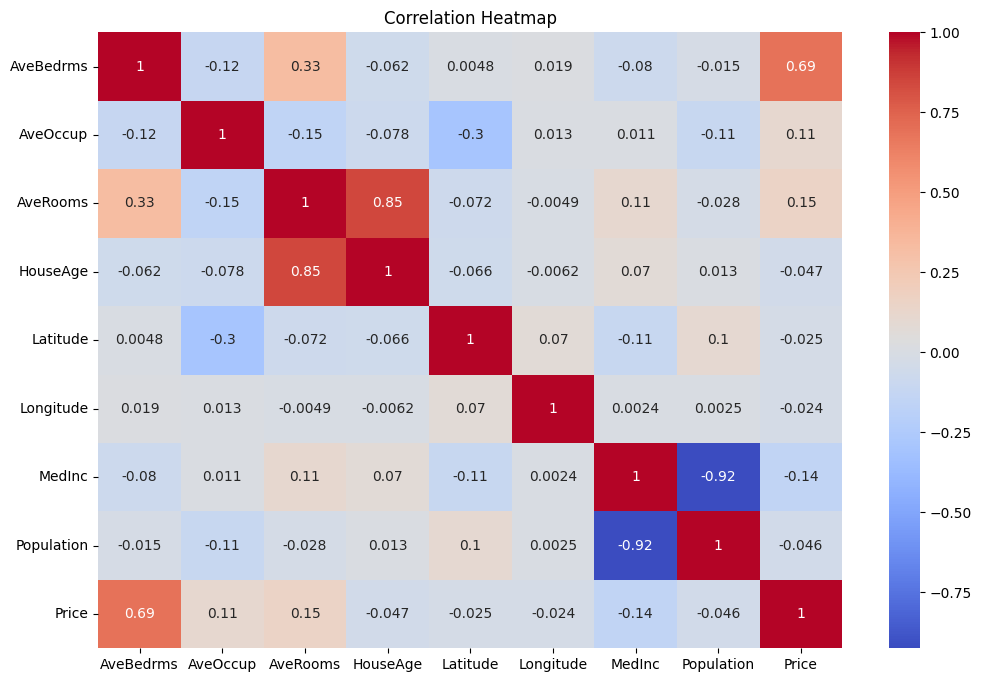

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

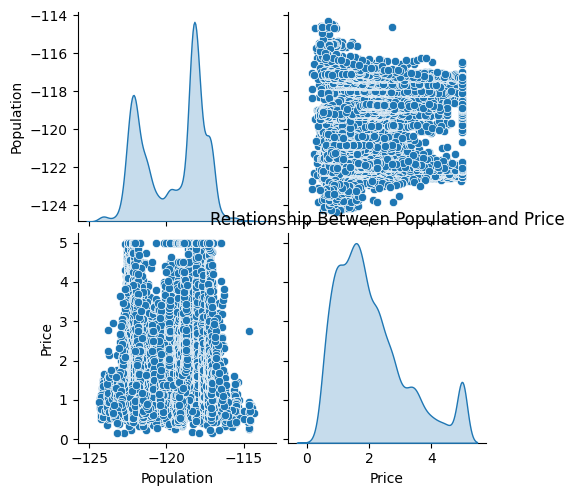

In [18]:
sns.pairplot(df[['Population', 'Price']], diag_kind='kde')

plt.xlabel('Population')
plt.ylabel('House Value')
plt.title('Relationship Between Population and Price')
plt.show()

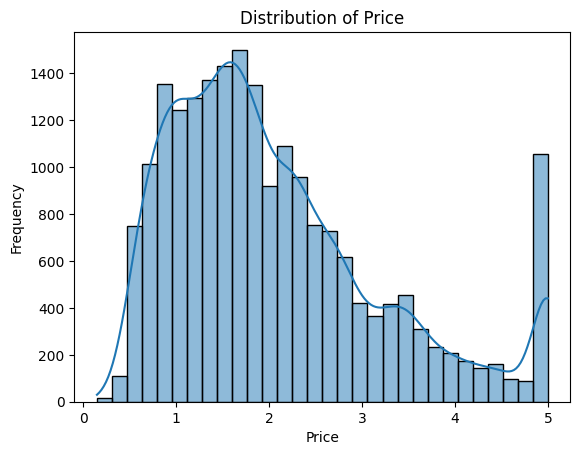

In [19]:
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

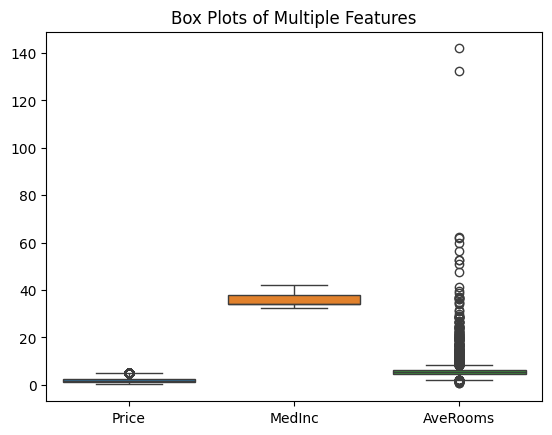

In [20]:
sns.boxplot(data=df[['Price', 'MedInc', 'AveRooms']])
plt.title('Box Plots of Multiple Features')
plt.show()

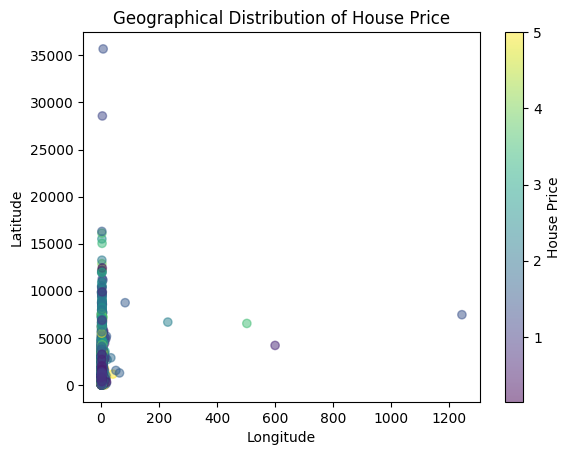

In [21]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Price')
plt.show()

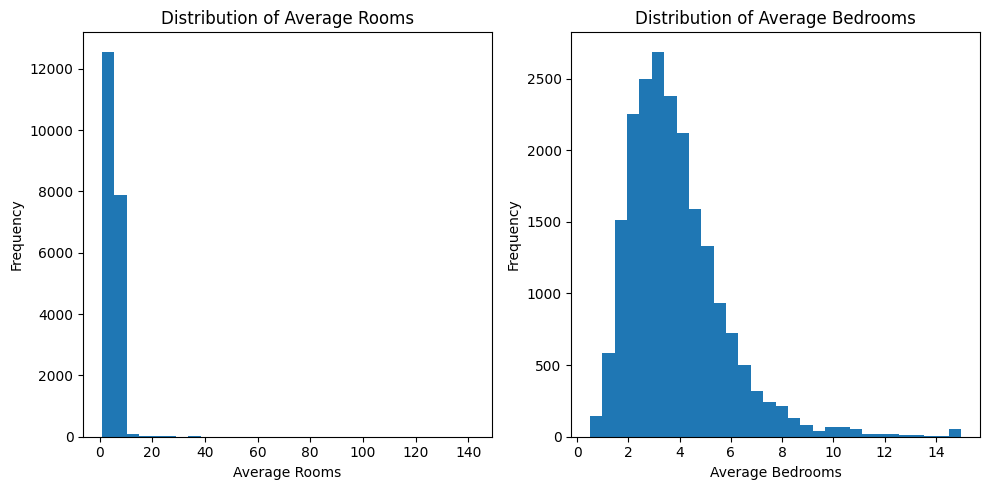

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['AveRooms'], bins=30)
axs[0].set_title('Distribution of Average Rooms')
axs[0].set_xlabel('Average Rooms')
axs[0].set_ylabel('Frequency')
axs[1].hist(df['AveBedrms'], bins=30)
axs[1].set_title('Distribution of Average Bedrooms')
axs[1].set_xlabel('Average Bedrooms')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


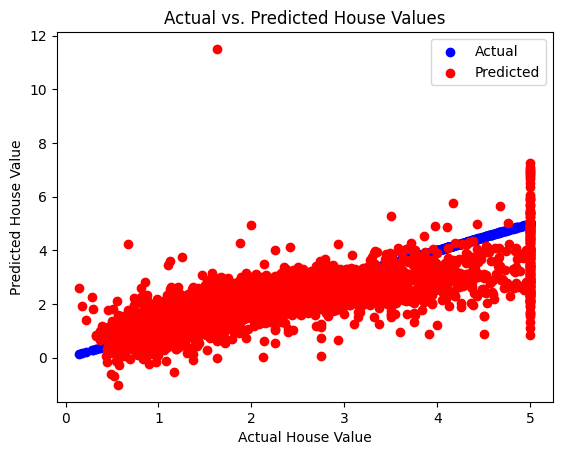

In [28]:
# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual') # Blue for actual values
# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted') # Red for predicted values
# Labeling the axes and title
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs. Predicted House Values")
# Add a legend to distinguish between actual and predicted
plt.legend()
# Display the plot
plt.show()

In [29]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results.head())

        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


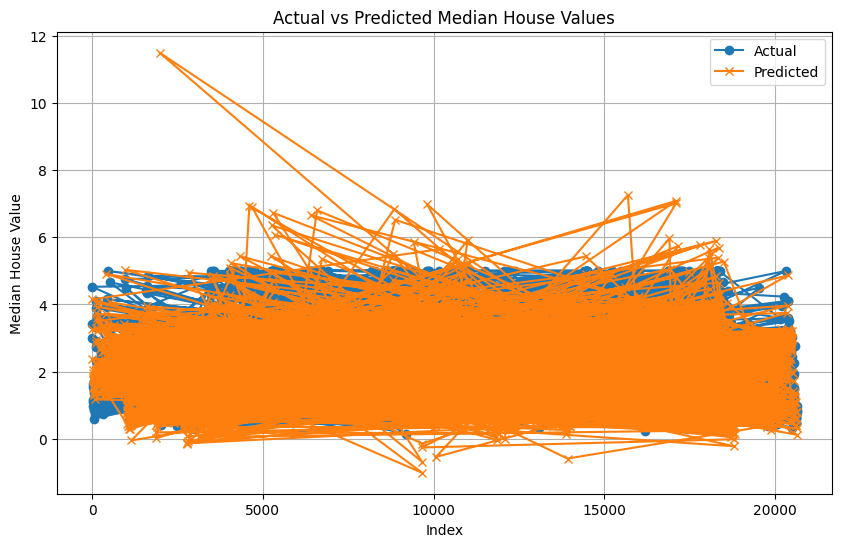

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df_results['Actual'], label='Actual', marker='o')
plt.plot(df_results['Predicted'], label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.legend()
plt.grid(True)
plt.show()

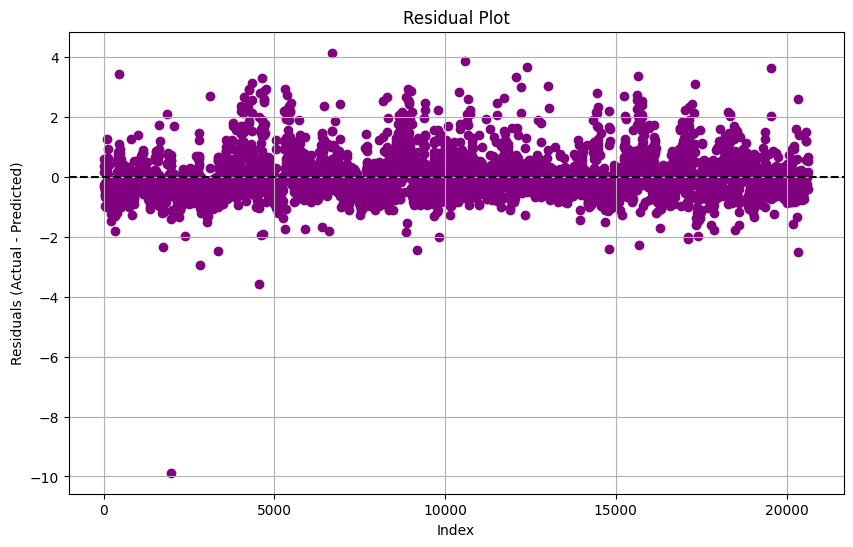

In [31]:
df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Residuals'], color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()